Name: Benjie S. Gonzales Jr.
<br>
Course & Year: BS in Computer Science IV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

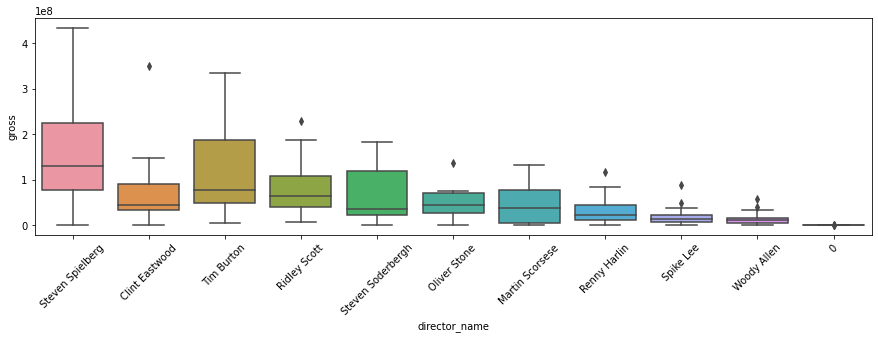

In [5]:
top10_by_directed = data["director_name"].value_counts()[:11].index.tolist()
top_directed_data = data[data["director_name"].isin(top10_by_directed)]
top_gross = top_directed_data.sort_values(by="gross", ascending=False)

plt.figure(figsize=(15,4))
sns.boxplot(x="director_name", y="gross", data=top_gross)
plt.xticks(rotation=45)
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

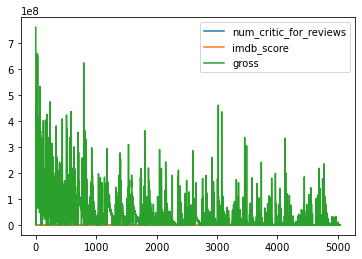

In [7]:
var = data[['num_critic_for_reviews', 'imdb_score', 'gross']]
var.plot()
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [8]:
data["sales"] = (data["gross"] - data["budget"])
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [18]:
dir_agg = data.groupby('director_name').sum()
top_dir_sales = dir_agg.sort_values(by="sales", ascending=False)[:10]
top_dir_sales['sales']

director_name
Steven Spielberg     2.451332e+09
George Lucas         1.386641e+09
James Cameron        1.199626e+09
Joss Whedon          1.000887e+09
Chris Columbus       9.417076e+08
Peter Jackson        9.009693e+08
Tim Burton           8.242755e+08
Christopher Nolan    8.082276e+08
Jon Favreau          7.693815e+08
Francis Lawrence     7.555020e+08
Name: sales, dtype: float64

## Plot sales and average likes as a scatterplot. Fit it with a line.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


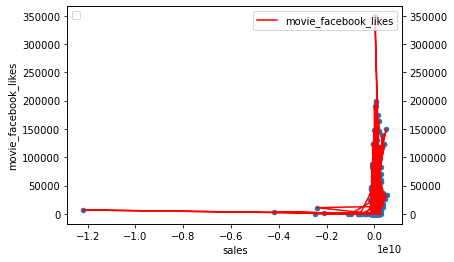

In [24]:
ax1 = data.plot(x="sales", y="movie_facebook_likes", kind="scatter")
ax2 = ax1.twinx()
data.plot(x="sales", y="movie_facebook_likes", kind="line", color='red', ax = ax2)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

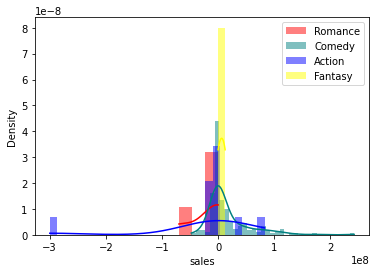

In [12]:
ax = sns.histplot(data[data['genres'] == 'Romance']["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['genres'] == 'Comedy']["sales"], color="teal", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Action']["sales"], color="blue", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Fantasy']["sales"], color="yellow", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

## Copying the whole dataframe

In [13]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [28]:
max = df['num_critic_for_reviews'].max()
min = df['num_critic_for_reviews'].min()
df['nm_num_critic_for_reviews'] = (df['num_critic_for_reviews'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,nm_duration,nm_num_critic_for_reviews
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,0.941799,0.889299
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,0.894180,0.371464
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,0.783069,0.740467
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,0.867725,1.000000
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,0.227513,0.052891
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.402116,0.015990
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,0.529101,0.017220
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,0.476190,0.052891


In [27]:
max = df['duration'].max()
min = df['duration'].min()
df['nm_duration'] = (df['duration'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,nm_duration
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,0.941799
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,0.894180
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,0.783069
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,0.867725
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,0.227513
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.402116
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,0.529101
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,0.476190


In [29]:
max = df['director_facebook_likes'].max()
min = df['director_facebook_likes'].min()
df['nm_director_facebook_likes'] = (df['director_facebook_likes'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,nm_duration,nm_num_critic_for_reviews,nm_director_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,0.941799,0.889299,0.000000
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,0.894180,0.371464,0.024478
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,0.783069,0.740467,0.000000
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,0.867725,1.000000,0.956522
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0.0,12.0,7.1,0.00,0.0,0.0,0.000000,0.000000,0.005696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,0.227513,0.052891,0.000000
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.402116,0.015990,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,0.529101,0.017220,0.000000
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,0.476190,0.052891,0.000696


In [30]:
max = df['actor_3_facebook_likes'].max()
min = df['actor_3_facebook_likes'].min()
df['nm_actor_3_facebook_likes'] = (df['actor_3_facebook_likes'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,nm_duration,nm_num_critic_for_reviews,nm_director_facebook_likes,nm_actor_3_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,2009.0,936.0,7.9,1.78,33000.0,523505847.0,0.941799,0.889299,0.000000,0.037174
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,2007.0,5000.0,7.1,2.35,0.0,9404152.0,0.894180,0.371464,0.024478,0.043478
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,0.783069,0.740467,0.000000,0.007000
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,0.867725,1.000000,0.956522,1.000000
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,12.0,7.1,0.00,0.0,0.0,0.000000,0.000000,0.005696,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.0,593.0,7.5,16.00,32000.0,0.0,0.227513,0.052891,0.000000,0.013870
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.402116,0.015990,0.000000,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,2012.0,719.0,6.3,2.35,660.0,10443.0,0.529101,0.017220,0.000000,0.021261
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,2004.0,23.0,6.6,1.85,456.0,84122.0,0.476190,0.052891,0.000696,0.000696


In [31]:
max = df['actor_1_facebook_likes'].max()
min = df['actor_1_facebook_likes'].min()
df['nm_actor_1_facebook_likes'] = (df['actor_1_facebook_likes'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,nm_duration,nm_num_critic_for_reviews,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,936.0,7.9,1.78,33000.0,523505847.0,0.941799,0.889299,0.000000,0.037174,0.001563
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,5000.0,7.1,2.35,0.0,9404152.0,0.894180,0.371464,0.024478,0.043478,0.062500
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,393.0,6.8,2.35,85000.0,-44925825.0,0.783069,0.740467,0.000000,0.007000,0.017188
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,23000.0,8.5,2.35,164000.0,198130642.0,0.867725,1.000000,0.956522,1.000000,0.042188
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,12.0,7.1,0.00,0.0,0.0,0.000000,0.000000,0.005696,0.000000,0.000205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,593.0,7.5,16.00,32000.0,0.0,0.227513,0.052891,0.000000,0.013870,0.001314
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.0,6.3,0.00,16.0,-1400.0,0.402116,0.015990,0.000000,0.000000,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,719.0,6.3,2.35,660.0,10443.0,0.529101,0.017220,0.000000,0.021261,0.001478
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,23.0,6.6,1.85,456.0,84122.0,0.476190,0.052891,0.000696,0.000696,0.000134


In [32]:
max = df['gross'].max()
min = df['gross'].min()
df['nm_gross'] = (df['gross'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,imdb_score,aspect_ratio,movie_facebook_likes,sales,nm_duration,nm_num_critic_for_reviews,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,7.9,1.78,33000.0,523505847.0,0.941799,0.889299,0.000000,0.037174,0.001563,1.000000
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,7.1,2.35,0.0,9404152.0,0.894180,0.371464,0.024478,0.043478,0.062500,0.406840
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,6.8,2.35,85000.0,-44925825.0,0.783069,0.740467,0.000000,0.007000,0.017188,0.263080
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,8.5,2.35,164000.0,198130642.0,0.867725,1.000000,0.956522,1.000000,0.042188,0.589253
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,7.1,0.00,0.0,0.0,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,7.5,16.00,32000.0,0.0,0.227513,0.052891,0.000000,0.013870,0.001314,0.000000
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,6.3,0.00,16.0,-1400.0,0.402116,0.015990,0.000000,0.000000,0.000000,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,6.3,2.35,660.0,10443.0,0.529101,0.017220,0.000000,0.021261,0.001478,0.000014
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,6.6,1.85,456.0,84122.0,0.476190,0.052891,0.000696,0.000696,0.000134,0.000112


In [33]:
max = df['num_voted_users'].max()
min = df['num_voted_users'].min()
df['nm_num_voted_users'] = (df['num_voted_users'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,aspect_ratio,movie_facebook_likes,sales,nm_duration,nm_num_critic_for_reviews,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,1.78,33000.0,523505847.0,0.941799,0.889299,0.000000,0.037174,0.001563,1.000000,0.524454
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,2.35,0.0,9404152.0,0.894180,0.371464,0.024478,0.043478,0.062500,0.406840,0.278867
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,2.35,85000.0,-44925825.0,0.783069,0.740467,0.000000,0.007000,0.017188,0.263080,0.163258
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2.35,164000.0,198130642.0,0.867725,1.000000,0.956522,1.000000,0.042188,0.589253,0.677217
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.00,0.0,0.0,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,16.00,32000.0,0.0,0.227513,0.052891,0.000000,0.013870,0.001314,0.000000,0.043698
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.00,16.0,-1400.0,0.402116,0.015990,0.000000,0.000000,0.000000,0.000000,0.000022
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,2.35,660.0,10443.0,0.529101,0.017220,0.000000,0.021261,0.001478,0.000014,0.000743
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,1.85,456.0,84122.0,0.476190,0.052891,0.000696,0.000696,0.000134,0.000112,0.002536


In [34]:
max = df['cast_total_facebook_likes'].max()
min = df['cast_total_facebook_likes'].min()
df['nm_cast_total_facebook_likes'] = (df['cast_total_facebook_likes'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,movie_facebook_likes,sales,nm_duration,nm_num_critic_for_reviews,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,33000.0,523505847.0,0.941799,0.889299,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.0,9404152.0,0.894180,0.371464,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,85000.0,-44925825.0,0.783069,0.740467,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,164000.0,198130642.0,0.867725,1.000000,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0.0,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,32000.0,0.0,0.227513,0.052891,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,16.0,-1400.0,0.402116,0.015990,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,660.0,10443.0,0.529101,0.017220,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,456.0,84122.0,0.476190,0.052891,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248


In [35]:
max = df['facenumber_in_poster'].max()
min = df['facenumber_in_poster'].min()
df['nm_facenumber_in_poster'] = (df['facenumber_in_poster'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,sales,nm_duration,nm_num_critic_for_reviews,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,523505847.0,0.941799,0.889299,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,9404152.0,0.894180,0.371464,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,-44925825.0,0.783069,0.740467,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,198130642.0,0.867725,1.000000,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.0,0.227513,0.052891,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,-1400.0,0.402116,0.015990,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,10443.0,0.529101,0.017220,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,84122.0,0.476190,0.052891,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000


In [38]:
max = df['num_user_for_reviews'].max()
min = df['num_user_for_reviews'].min()
df['nm_num_user_for_reviews'] = (df['num_user_for_reviews'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_duration,nm_num_critic_for_reviews,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.941799,0.889299,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.894180,0.371464,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,0.783069,0.740467,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,0.867725,1.000000,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.227513,0.052891,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.402116,0.015990,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.529101,0.017220,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,0.476190,0.052891,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601


In [41]:
max = df['budget'].max()
min = df['budget'].min()
df['nm_budget'] = (df['budget'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_num_critic_for_reviews,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.889299,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.371464,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,0.740467,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,1.000000,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.052891,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.015990,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.017220,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,0.052891,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08


In [42]:
max = df['actor_2_facebook_likes'].max()
min = df['actor_2_facebook_likes'].min()
df['nm_actor_2_facebook_likes'] = (df['actor_2_facebook_likes'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_actor_2_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.006832
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.036496
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.002869
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.167883
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.004328
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.005248
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.000168


In [43]:
max = df['imdb_score'].max()
min = df['imdb_score'].min()
df['nm_imdb_score'] = (df['imdb_score'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_actor_2_facebook_likes,nm_imdb_score
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.006832,0.831579
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.036496,0.747368
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.002869,0.715789
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.167883,0.894737
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000088,0.747368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.004328,0.789474
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.000000,0.663158
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.005248,0.663158
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.000168,0.694737


In [44]:
max = df['aspect_ratio'].max()
min = df['aspect_ratio'].min()
df['nm_aspect_ratio'] = (df['aspect_ratio'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.006832,0.831579,0.111250
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.036496,0.747368,0.146875
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.002869,0.715789,0.146875
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.167883,0.894737,0.146875
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000088,0.747368,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.004328,0.789474,1.000000
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.000000,0.663158,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.005248,0.663158,0.146875
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.000168,0.694737,0.115625


In [45]:
max = df['movie_facebook_likes'].max()
min = df['movie_facebook_likes'].min()
df['nm_movie_facebook_likes'] = (df['movie_facebook_likes'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio,nm_movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.006832,0.831579,0.111250,0.094556
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.036496,0.747368,0.146875,0.000000
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.002869,0.715789,0.146875,0.243553
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.167883,0.894737,0.146875,0.469914
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000088,0.747368,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.004328,0.789474,1.000000,0.091691
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.000000,0.663158,0.000000,0.000046
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.005248,0.663158,0.146875,0.001891
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.000168,0.694737,0.115625,0.001307
